# A single neuron classifier

Our **brain** consists of millions of **neurons** which function together to perform complex functions such as visual and speech recognition. Each neuron in our brain, on receiving inputs (signals) from other neurons, transmits signals to other connected neurons if their sum exceeds a certain threshold. Hence, each neuron can be thought of as a simple computational unit, but when made to work together with a large number of other neurons, can perform complex tasks. This model of **biological neural networks** led to **artificial neural networks (ANNs)** which are widely used in machine learning and artificial intelligence.

I'll not talk about biological neurons in this post. But instead, let's just focus our attention towards using artificial neural networks for a simple classification problem. We are given with a **set of 2-D points** $\{X_1, X_2..X_N\}$ ( as shown below) and they belong to two different classes **yellow** and **green** stored in $\{Y_1, Y_2,..Y_N\}$ which takes either -1 and +1 (2 classes). Given this setting, our aim is to classify them based on their 2D coordinates. To do this, let's try to model this task using just a single neuron.

<img src="https://rawgit.com/rajcscw/minimalistic-ml/master/single-neuron-classifier/points.svg" style="float: left; width: 45%; margin-right: 1%; margin-bottom: 0.5em;">
<img src="https://rawgit.com/rajcscw/minimalistic-ml/master/single-neuron-classifier/neuron.svg" style="float: left; width: 45%; margin-right: 1%; margin-bottom: 0.5em;">
<p style="clear: both;">

As shown in the above figure, the neuron takes two inputs $x_1$ and $x_2$  ie. two coordinates of a point and calculates the output as the the weighted sum of the inputs $\sum w_j x_j$, weights for each inputs being $w_1$ and $w_2$ respectively. We want the output to be either -1 or +1 so that the neuron's output can be concluded as the class for that point. For this reason, we apply a function typically known as **activation function** $tanh()$ which squashes the values in the range $(-1,+1)$.  

So, in nutshell, the net output of the neuron for the input $X$ is defined as 

\begin{equation}
f(X) = tanh(out((X))
\end{equation}
\begin{equation}
out(X) = \sum w_j x_j + b = W X^T + b
\end{equation}

Note: we define the weights and inputs as column vectors $W = \begin{bmatrix}w_1\\w_2\end{bmatrix}$ and $X = \begin{bmatrix}w_1 \\w_2\end{bmatrix}$

Like in [linear regression](https://github.com/rajcscw/minimalistic-ml/blob/master/simple-linear-regression/simple-linear-regression.ipynb), the task now boils down to finding optimal value for $W$ & $b$ and this can be done easily with the help of gradient descent. We will minimize the loss function $L_i$ for each input $X_i$ given as (we stick to squared loss for simplicity, however for classification tasks such as this, different loss functions like softmax loss are used)

\begin{equation}
L_i = \frac{1}{2} (f(X_i) - Y_i)^2
\end{equation}

Let's differentiate $L_i$ w.r.t to $W$ and $b$ using chain rule of differentiation,

\begin{align}
\frac{\partial L_i}{\partial W} &= \frac{1}{2} 2(f(X_i) - Y_i)  \frac{\partial}{\partial W} (f(X_i) - Y_i) \\\
                                &= (f(X_i) - Y_i)  \frac{\partial}{\partial W} (tanh(out(X_i)))  \\\
                                &= (f(X_i) - Y_i) (1-tanh^2(out(X_i)) \frac{\partial}{\partial W} (out(X_i)) \\\
                                &= (f(X_i) - Y_i) (1-tanh^2(out(X_i)) \frac{\partial}{\partial W} (W X_{i}^T + b)\\\
                                &= (f(X_i) - Y_i) (1-tanh^2(out(X_i)) X_{i}^T \\\
                                &= (f(X_i) - Y_i) (1-f^2(X_i)) X_{i}^T
\end{align}

\begin{align}
\frac{\partial L_i}{\partial b} &= \frac{1}{2} 2(f(X_i) - Y_i)  \frac{\partial}{\partial b} (f(X_i) - Y_i) \\\
                                &= (f(X_i) - Y_i)  \frac{\partial}{\partial b} (tanh(out(X_i)))  \\\
                                &= (f(X_i) - Y_i) (1-tanh^2(out(X_i)) \frac{\partial}{\partial b} (out(X_i)) \\\
                                &= (f(X_i) - Y_i) (1-tanh^2(out(X_i)) \frac{\partial}{\partial b} (W X_{i}^T + b)\\\
                                &= (f(X_i) - Y_i) (1-tanh^2(out(X_i)) (1) \\\
                                &= (f(X_i) - Y_i) (1-f^2(X_i))
\end{align}

The update equation for $W$ and $b$ for the input $X_i$ is 

\begin{align}
W &= W - \eta \frac{\partial L_i}{\partial W} \\\
&= W - \eta (f(X_i) - Y_i) (1-f^2(X_i)) X_{i}^T
\end{align}

\begin{align}
b &= b - \eta \frac{\partial L_i}{\partial b} \\\
&= b - \eta (f(X_i) - Y_i) (1-f^2(X_i))
\end{align}

After updating $W$ and $b$ for all the data points and repeating this iteratively for many times, our neuron is trained completely to classify data points. We can input any point $X$ to the neuron, compute $f(X)$. If $f(X) <= 0$, we declare that it belongs to one class and if $f(X) > 0$, it belongs to other class.

We can convert this math into a simple python program and test if it can classify the points correctly :)

First, we import the packages that are needed for plotting and arithmetics

In [17]:
%matplotlib notebook
%config InlineBackend.figure_format = 'svg'

from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

Define the function to calculate $f(X)$

In [18]:
def fun(W, b, X):
    return np.tanh(np.dot(W, X)+b)

Next, we define a function that generates set of points from two different classes (the one shown in the above picture) using sklearn package.

In [19]:
def generate_points(N,D):
    X, Y = datasets.make_moons(n_samples=N, noise=0.3, random_state=0)
    X = X.T
    Y[Y==0] = -1
    return X,Y

We define the function that declares whether a point belongs to yellow or green. This function will be used once we have found the optimal weights $W$

In [20]:
def predict(W,b, X):
    pred = fun(W, b, X)
    pred[pred <= 0] = -1
    pred[pred > 0] = 1
    return pred

Using the defined function above, we generate 1000 points in 2-D. Also, we initialize $W$ to random values in the start and set other parameters such as number of iterations and step size for gradient descent.

In [21]:
# Generate data
N = 1000
D = 2
np.random.seed(0)
X,Y = generate_points(N,D)

# Initialize weight W
W = np.random.rand(D)
b = np.random.rand(1)

# Parameters
n_iter = 500
step_size = 1e-4

Here comes the core process .ie. training your neuron. This is just a translation of our crazy yet simple equations. Make sure, you compare them with code. This code also prints the percentage of misclassified points every 10 iterations. Ideally, we should see that this percentage dropping (a sign of learning)

In [22]:
# Train the neuron
for i in range(n_iter):
    for j in range(N):
        # x and y
        x = X[:,j]
        y = Y[j]

        # Do a forward pass
        f = fun(W, b, x)

        # Compute gradients
        w_grad = (f - y) * (1-f**2) * x.T
        b_grad = (f - y) * (1-f**2)

        # Do a backward pass (updates gradient)
        W -= step_size * w_grad
        b -= step_size * b_grad

    # Print squared loss every 10 iterations
    if i % 10 == 0:
        Y_pred = predict(W, b, X)
        incorrect = np.sum(Y != Y_pred)
        print("Loss: "+str(incorrect/N * 100)+" %")

Loss: 48.0 %
Loss: 41.1 %
Loss: 32.0 %
Loss: 26.4 %
Loss: 22.4 %
Loss: 19.8 %
Loss: 18.7 %
Loss: 18.1 %
Loss: 17.5 %
Loss: 16.8 %
Loss: 16.3 %
Loss: 15.9 %
Loss: 15.9 %
Loss: 16.1 %
Loss: 16.1 %
Loss: 16.1 %
Loss: 16.0 %
Loss: 15.9 %
Loss: 15.8 %
Loss: 15.8 %
Loss: 15.8 %
Loss: 15.8 %
Loss: 15.9 %
Loss: 15.8 %
Loss: 15.8 %
Loss: 15.8 %
Loss: 15.8 %
Loss: 15.7 %
Loss: 15.7 %
Loss: 15.7 %
Loss: 15.6 %
Loss: 15.6 %
Loss: 15.6 %
Loss: 15.5 %
Loss: 15.3 %
Loss: 15.4 %
Loss: 15.5 %
Loss: 15.5 %
Loss: 15.5 %
Loss: 15.5 %
Loss: 15.5 %
Loss: 15.5 %
Loss: 15.5 %
Loss: 15.5 %
Loss: 15.5 %
Loss: 15.5 %
Loss: 15.5 %
Loss: 15.5 %
Loss: 15.5 %
Loss: 15.5 %


Excellent! Only 15% of the points are misclassified. Ok, can we visualize what the neuron has learnt? Yes, this is a neat trick. We can do a complete sweep across all the points and classify each point as yellow or green and plot them as a contour map. Enough of talk, let's just see what the following will produce!

<IPython.core.display.Javascript object>


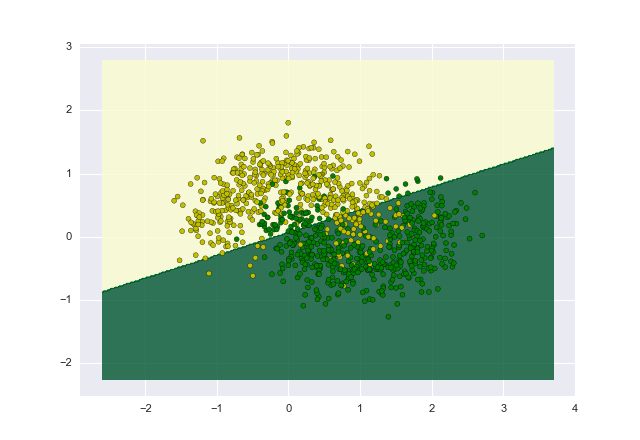

In [23]:
# Plot the decision boundary
fig = plt.figure()
ax = fig.add_subplot(111)
h = .02
x_min, x_max = X[0, :].min() - 1, X[0,:].max() + 1
y_min, y_max = X[1,:].min() - 1, X[1,:].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = predict(W, b, np.c_[xx.ravel(),yy.ravel()].T)
Z = Z.reshape(xx.shape)
cm = plt.cm.YlGn
ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
col = np.where(Y==-1,'y','g')
ax.scatter(X[0, :],X[1,:],c=col)
plt.show()

Wow! This looks great! What does this mean? The neuron has learnt to separate the points using a simple line. Any point below the line is declared as green and above the line as yellow. However, if you observe closely, there are some green points in the yellow region. These are misclassified points by the neuron. It classified them as yellow, but by truth, they are green. This is the reason for 15% loss. Finally, we calculate the accuracy of the neuron classifier. Obviously, it should be 85%.

In [24]:
# Print accuracy
Y_pred = predict(W, b, X)
correct = np.sum(Y == Y_pred)
print("The accuracy is: " + str(correct/N * 100)+" %")

The accuracy is: 84.5 %


In this post, we discussed how a single neuron can act as a classifier. The results were good (accuracy of 85%). Can it do better? Yes, that is the power of neural networks, we get more horse power by adding few more neurons, more precisely, a layer of neurons. More on this, in the next post!